# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [3]:
#read the data
data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path, decimal = ',')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [5]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [6]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

<AxesSubplot:>

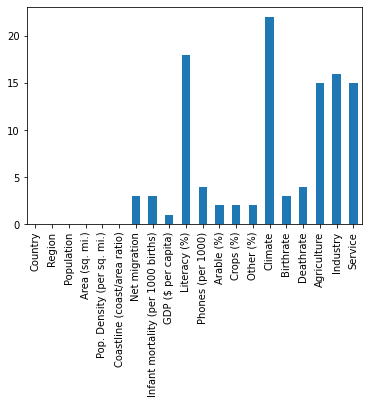

In [7]:
df.isnull().sum().plot(kind='bar')

In [8]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [9]:
df.duplicated(subset = ['Country']).sum()

0

In [10]:
df[df['Population']  > 1000000000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.4,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,45.4,54.4,2.74,42.86,2.5,22.01,8.18,0.186,0.276,0.538


In [11]:
print(((df['Agriculture'] + df['Industry'] + df['Service']) == 1).sum())
print(((df['Agriculture'] + df['Industry'] + df['Service']) > 1).sum())
print(((df['Agriculture'] + df['Industry'] + df['Service']) < 1).sum())

168
18
25


In [12]:
print(((df['Arable (%)'] + df['Crops (%)'] + df['Other (%)']) == 100).sum())
print(((df['Arable (%)'] + df['Crops (%)'] + df['Other (%)']) > 100).sum())
print(((df['Arable (%)'] + df['Crops (%)'] + df['Other (%)']) < 100).sum())

220
4
1


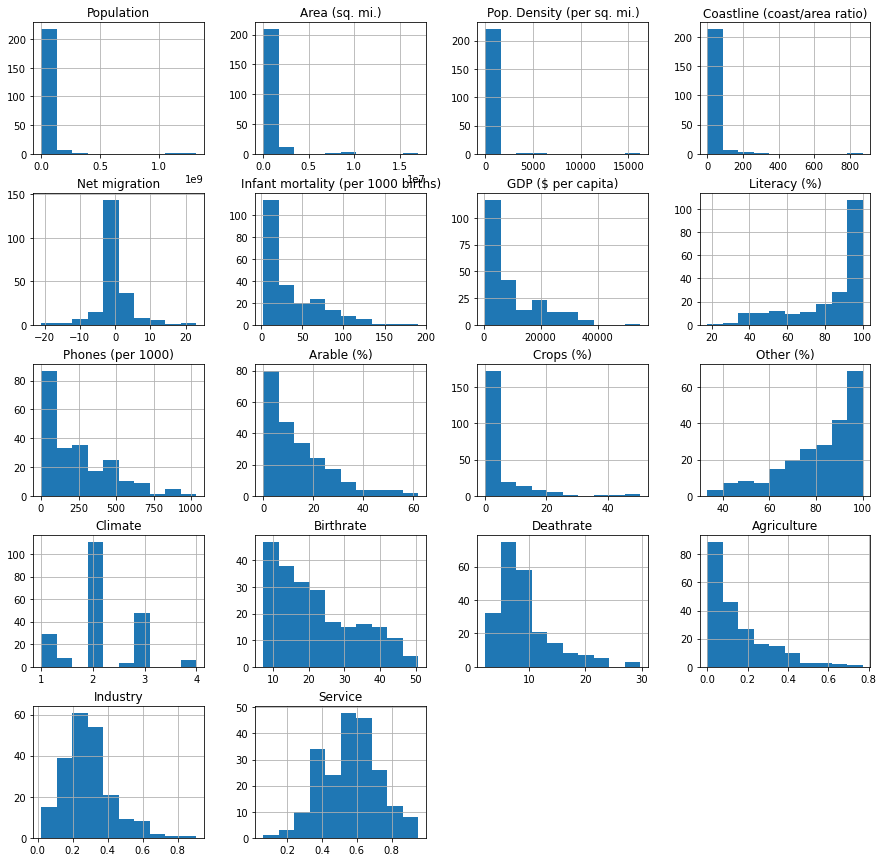

In [13]:
df.iloc[:, 2:].hist(figsize=(15,15))
plt.show()

In [14]:
def detect_outliers(feature , df):
    q25 = np.percentile(df[feature] , 25)
    q75 = np.percentile(df[feature] , 75)
    IQR = q75 - q25
    up = q75 + 1.5 * IQR
    lo = q25 - 1.5 * IQR
    points_greaterThan_upper = len(df[df[feature] > up])
    points_lowerThan_lower = len(df[df[feature] < lo])
    return points_greaterThan_upper + points_lowerThan_lower

In [15]:
for col in df.columns:
    if df[col].dtype != 'object':
        no_of_outliers = detect_outliers(col,df)
        print(f"{col} has {no_of_outliers} outlier")

Population has 28 outlier
Area (sq. mi.) has 28 outlier
Pop. Density (per sq. mi.) has 21 outlier
Coastline (coast/area ratio) has 37 outlier
Net migration has 0 outlier
Infant mortality (per 1000 births) has 0 outlier
GDP ($ per capita) has 0 outlier
Literacy (%) has 0 outlier
Phones (per 1000) has 0 outlier
Arable (%) has 0 outlier
Crops (%) has 0 outlier
Other (%) has 0 outlier
Climate has 0 outlier
Birthrate has 0 outlier
Deathrate has 0 outlier
Agriculture has 0 outlier
Industry has 0 outlier
Service has 0 outlier


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part

1-   There are columns contain outliers        <br> 
2-   Dataset contain missing values         <br>

In [16]:
#make a copy for the original dataset
df_copy = df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution on the data
- test the solution to make sure that you have solved the issue

In [17]:
df_copy.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


**First issue**

In [18]:
#solution 
def remove_outliers(feature):
    q25 = np.percentile(df_copy[feature] , 25)
    q75 = np.percentile(df_copy[feature] , 75)
    IQR = q75 - q25
    up = q75 + 1.5 * IQR
    lo = q25 - 1.5 * IQR
    df_copy[feature] = df_copy[feature].clip(upper = up)
    df_copy[feature] = df_copy[feature].clip(lower = lo)

for col in df_copy.columns:
    if df_copy[col].dtype != 'object':
        remove_outliers(col)

In [19]:
#test 
for col in df_copy.columns:
    if df_copy[col].dtype != 'object':
        no_of_outliers = detect_outliers(col,df_copy)
        print(f"{col} has {no_of_outliers} outlier")

Population has 0 outlier
Area (sq. mi.) has 0 outlier
Pop. Density (per sq. mi.) has 0 outlier
Coastline (coast/area ratio) has 0 outlier
Net migration has 0 outlier
Infant mortality (per 1000 births) has 0 outlier
GDP ($ per capita) has 0 outlier
Literacy (%) has 0 outlier
Phones (per 1000) has 0 outlier
Arable (%) has 0 outlier
Crops (%) has 0 outlier
Other (%) has 0 outlier
Climate has 0 outlier
Birthrate has 0 outlier
Deathrate has 0 outlier
Agriculture has 0 outlier
Industry has 0 outlier
Service has 0 outlier


**Second issue**

In [20]:
df_copy.shape

(227, 20)

In [21]:
#solution 
print(df_copy.shape)
df_copy = df_copy.fillna(df_copy.mean())

(227, 20)


In [22]:
#test 
print(df_copy.shape)
print(df_copy.isnull().sum())

(227, 20)
Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


In [23]:
df_copy.shape

(227, 20)

In [24]:
# df_copy = df_copy[((df_copy['Agriculture'] + df_copy['Industry'] + df_copy['Service']) == 1)]

In [25]:
# df_copy = df_copy[((df_copy['Arable (%)'] + df_copy['Crops (%)'] + df_copy['Other (%)']) == 100)]

In [26]:
final_shape = df_copy.shape
print(final_shape)

(227, 20)


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [27]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
df_copy['Country'] = lb_encoder.fit_transform(df_copy['Country'])
df_copy['Region'] = lb_encoder.fit_transform(df_copy['Region'])

In [28]:
df_copy.to_csv('countries_of_the_world_new.csv')

In [29]:
df_copy.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0,31056997.0,647500.00,48.0,0.0000,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000
1,1,3,3581655.0,28748.00,124.6,1.2600,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000
2,2,6,32930091.0,1097556.25,13.8,0.0400,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000
3,3,8,57794.0,199.00,290.4,25.7125,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.150844,0.282711,0.565283
4,4,10,71201.0,468.00,152.1,0.0000,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.150844,0.282711,0.565283


In [30]:
df_copy.shape

(227, 20)

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    int64  
 1   Region                              227 non-null    int64  
 2   Population                          227 non-null    float64
 3   Area (sq. mi.)                      227 non-null    float64
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scalar = StandardScaler()
for col in df_copy.columns:
    df_copy[col] = scalar.fit_transform(np.array(df_copy[col]).reshape(-1,1)) 

In [34]:
df_copy.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-1.724437,-1.707114,1.295583,0.962922,-0.622973,-0.680287,4.750696,3.636688,-0.898554,-2.481004,-1.032796,-0.128695,-0.523020,0.374938,-1.717937,2.210300,2.249075,1.619132e+00,-3.211494e-01,-1.158818
1,-1.709177,-0.813536,-0.553375,-0.669671,-0.054671,-0.553683,-1.025201,-0.398754,-0.518735,0.193960,-0.731200,0.562986,-0.017364,-0.445827,1.298569,-0.632321,-0.814901,5.734169e-01,-7.121448e-01,0.085790
2,-1.693916,0.080041,1.421633,2.150407,-0.876705,-0.676268,-0.088346,-0.128489,-0.368806,-0.680038,-0.700597,-0.816517,-0.519408,0.928767,-1.717937,-0.449072,-0.938514,-3.521823e-01,2.385742e+00,-1.671672
3,-1.678656,0.675760,-0.790514,-0.744998,1.175413,1.903291,-4.281495,-0.747988,-0.168902,0.750140,0.103956,-0.293124,1.256409,-0.414019,-0.209684,0.031168,-1.210057,1.961110e-16,4.173963e-16,0.000000
4,-1.663395,1.271478,-0.789611,-0.744288,0.149354,-0.680287,1.354081,-0.896805,0.930574,0.909049,1.158212,-0.893713,-0.549507,1.006727,1.298569,-1.210053,-0.606178,1.961110e-16,4.173963e-16,0.000000


In [35]:
df_copy.shape

(227, 20)

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [36]:
import scipy.cluster.hierarchy as shc

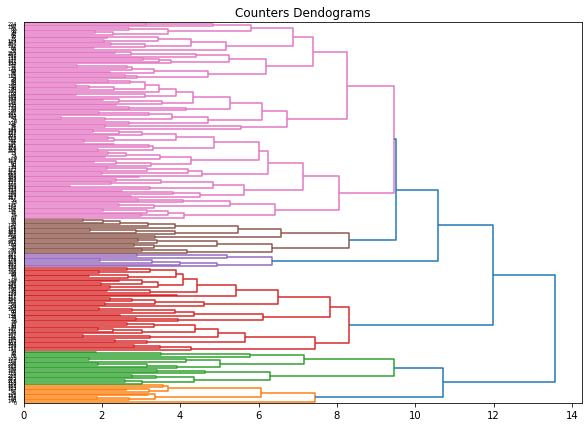

In [37]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy , method='complete',metric='euclidean'),orientation='right')
#fill y with your dataframe
#and method with linkage criteria
#and metric with distance function

## Kmeans Clustering

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [39]:
no_of_clusters = [2,3,4,5,6,7,8,9,10]
k_scores = {}
Elbow = []
for k in no_of_clusters:
    kmean = KMeans(n_clusters=k, init='k-means++')
    kmean.fit(df_copy)
    Elbow.append(kmean.inertia_)
    labels = kmean.labels_
    score = silhouette_score(df_copy, labels)
    k_scores[k] = score

In [40]:
k_scores

{2: 0.19417589633489063,
 3: 0.1465343613730197,
 4: 0.15245139450149497,
 5: 0.15184310719429037,
 6: 0.15828814301245003,
 7: 0.1436964567930502,
 8: 0.15266574049655046,
 9: 0.1415535843179141,
 10: 0.14323463970059994}

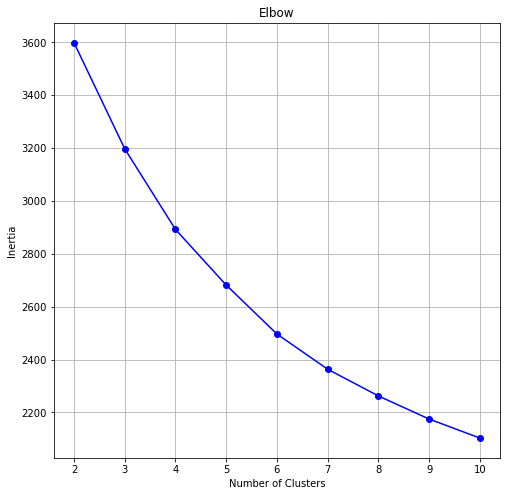

In [41]:
plt.figure(figsize=(8,8))
plt.grid(True)
plt.plot(no_of_clusters, Elbow, 'bo-')
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.title('Elbow')
plt.show()

## Agglomerative Clustering

In [42]:
#training
from sklearn.cluster import AgglomerativeClustering

h_scores = {}
no_of_clusters = [2,3,4,5,6,7,8,9,10]
for k in no_of_clusters:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(df_copy)
    labels = model.labels_
    score = silhouette_score(df_copy, labels)
    h_scores[k] = score

In [43]:
h_scores

{2: 0.20662970276189926,
 3: 0.13553444556236907,
 4: 0.12577651102999826,
 5: 0.1228347494405338,
 6: 0.12107121840584288,
 7: 0.1321758977278528,
 8: 0.1313092073613784,
 9: 0.1376993918922805,
 10: 0.13963778801568372}

## Compare between Kmeans and Agglomerative Clustering(4 clusters)

In [44]:
k = 4
kmean = KMeans(n_clusters=k, init='k-means++')
kmean.fit(df_copy)
labels = kmean.labels_
kmeans_score = silhouette_score(df_copy, labels)
print('Kmeans score {}'.format(kmeans_score))

hierarchical = AgglomerativeClustering(n_clusters=k)
hierarchical.fit(df_copy)
labels = hierarchical.labels_
hierarchical_score = silhouette_score(df_copy, labels)

print('hierarchical score {}'.format(hierarchical_score))
print('Kmeans is better than hierarchical clustering in this problem')

Kmeans score 0.15271505525559553
hierarchical score 0.12577651102999826
Kmeans is better than hierarchical clustering in this problem


## Kmeans is better than hierarchical clustering in this problem

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 